<a id='return_home'></a>

## Andrew Frazier
## MSBA 320: Final Project
## April 20, 2022

## Interactive Plot Directory

1. [State Population](#pop_interactive)
2. [Annual Population Change](#pop_delta_interactive)
3. [GDP as a function of State Population](#pop_gdp_scatter)
4. [Per Capita GDP as a function of State Population](#per_cap_gdp_pop)  
5. [Gini Index relative to State Population](#gini_population)  
6. [Median Rent as a function of State Population](#median_rent)  
7. [Households occuped by renters relative to State Population](#renter_occ)  
8. [Upper Quartile House Value relative to State Population](#house_value)  
9. [Surplus Income by State](#surplus_income_state)  
10. [Surplus Income vs Per Pupil Expenditures](#income_pupil_expenditure)  
11. [3D Scatterplot: Surplus Income, Per Student Expenditure, Transporation Costs](#income_expend_trans)  

In [434]:
# clear variable cache
%reset -f

In [435]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [436]:
#Set Working Directory
os.getcwd()
os.chdir('/home/ad-frazier/data_science/MSBA_320/final_project/')

In [437]:
pd.set_option('display.max_columns', None),
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Data Import

In [438]:
df = pd.read_csv('core_df.csv')

# sort by state and year in ascending order
df = df.sort_values(by=['state', 'year'], ascending=True)

df.head(5)

,state,year,population,subsidies,taxes_on_production_and_imports_(topi),gdp_compensation,gdp_current_dollar,gdp_gross_operating_surplus,per_capita_personal_income,per_cap_gdp_current_dollar,poverty_rate,gini_index,median_age,median_income,mean_usual_hours,median_monthly_house_cost,house_low_value_quartile,house_median_value,house_upper_value_quartile,rent_low_value_quartile,rent_median_value,rent_upper_value_quartile,household_renter_occ_ratio,household_owner_occ_ratio,households_occupied_ratio,per_pupil_revenue,per_pupil_expenditure,edu_associate_degree,edu_bachelor_degree,edu_high_school,edu_master_degree,edu_total,pce_clothing_footwear_and_related_services,pce_communication,pce_education,pce_financial_services_and_insurance,pce_food_and_beverages_purchased_for_off-premises_consumption,pce_food_services_and_accommodations,pce_furnishings_household_equipment_and_routine_household_maintenance,pce_health,pce_housing_utilities_and_fuels,pce_other_goods_and_services,pce_total,pce_recreation,pce_transportation,sa,naics_sector,business_applications,business_applications_from_corporations,high_propensity_business_application
0,AL,1997,4367935.00,-62.84,1546.45,13984.59,104811900000.00,8527.58,21516.00,23995.76,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5535.00,4849.00,NaN,NaN,NaN,NaN,NaN,791.52,429.33,264.77,1150.80,1773.68,979.57,914.35,3336.73,3058.88,1001.78,17644.70,1544.12,2164.52,NaN,NaN,NaN,NaN,NaN
1,AL,1998,4404701.00,-66.50,1582.01,14568.21,110212000000.00,8937.75,22668.00,25021.45,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5975.00,5188.00,NaN,NaN,NaN,NaN,NaN,825.60,442.10,282.47,1225.83,1785.91,1013.60,942.74,3452.36,3179.88,1044.50,18271.61,1592.50,2204.33,NaN,NaN,NaN,NaN,NaN
2,AL,1999,4430141.00,-87.67,1654.48,15174.48,115680100000.00,9370.74,23333.00,26112.06,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6523.00,5638.00,NaN,NaN,NaN,NaN,NaN,858.71,460.96,300.35,1312.78,1843.37,1064.26,977.24,3561.44,3319.65,1124.68,19194.47,1667.71,2385.66,NaN,NaN,NaN,NaN,NaN
3,AL,2000,4452173.00,-81.92,1767.36,15669.74,119851700000.00,9564.63,24306.00,26919.82,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6503.00,5885.00,NaN,NaN,NaN,NaN,NaN,878.27,485.99,324.31,1445.23,1872.30,1094.95,1001.35,3759.89,3531.02,1173.99,20198.90,1722.22,2551.47,NaN,NaN,NaN,NaN,NaN
4,AL,2001,4467634.00,-106.50,1791.62,16124.51,122915500000.00,9702.81,25057.00,27512.44,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6956.00,6029.00,NaN,NaN,NaN,NaN,NaN,875.12,492.95,334.29,1423.42,1968.40,1111.80,1002.34,4053.55,3771.53,1220.27,20911.81,1738.33,2543.76,NaN,NaN,NaN,NaN,NaN


In [439]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 50 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   state                                                                  1176 non-null   object 
 1   year                                                                   1176 non-null   int64  
 2   population                                                             1176 non-null   float64
 3   subsidies                                                              1176 non-null   float64
 4   taxes_on_production_and_imports_(topi)                                 1176 non-null   float64
 5   gdp_compensation                                                       1176 non-null   float64
 6   gdp_current_dollar                                                     1176 non-null   f

50 Columns across 1176 observations. Null values are due to dataframe timerange not including census data for all years

In [440]:
# change year to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [441]:
df.describe(include='all')

/tmp/ipykernel_3369383/2884002236.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,state,year,population,subsidies,taxes_on_production_and_imports_(topi),gdp_compensation,gdp_current_dollar,gdp_gross_operating_surplus,per_capita_personal_income,per_cap_gdp_current_dollar,poverty_rate,gini_index,median_age,median_income,mean_usual_hours,median_monthly_house_cost,house_low_value_quartile,house_median_value,house_upper_value_quartile,rent_low_value_quartile,rent_median_value,rent_upper_value_quartile,household_renter_occ_ratio,household_owner_occ_ratio,households_occupied_ratio,per_pupil_revenue,per_pupil_expenditure,edu_associate_degree,edu_bachelor_degree,edu_high_school,edu_master_degree,edu_total,pce_clothing_footwear_and_related_services,pce_communication,pce_education,pce_financial_services_and_insurance,pce_food_and_beverages_purchased_for_off-premises_consumption,pce_food_services_and_accommodations,pce_furnishings_household_equipment_and_routine_household_maintenance,pce_health,pce_housing_utilities_and_fuels,pce_other_goods_and_services,pce_total,pce_recreation,pce_transportation,sa,naics_sector,business_applications,business_applications_from_corporations,high_propensity_business_application
count,1176,1176,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,686.00,735.00,735.00,735.00,735.00,637.00,637.00,637.00,637.00,637.00,637.00,735.00,735.00,735.00,1078.00,1078.00,588.00,588.00,588.00,588.00,588.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,1176.00,784,784,784.00,784.00,784.00
unique,49,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
top,AL,1997-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Total for All NAICS,NaN,NaN,NaN
freq,24,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784,784,NaN,NaN,NaN
first,NaN,1997-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6171035.69,-325.78,3299.06,26158.97,296684540561.22,18458.35,39714.87,47590.60,0.13,0.46,37.81,53350.11,38.81,1062.42,129516.17,204400.78,312425.43,520.22,715.13,958.83,0.31,0.69,0.87,11312.22,9915.42,0.08,0.18,0.25,0.08,4308349.53,1065.47,621.00,684.98,2440.34,2540.81,2016.59,1406.69,6373.82,5756.13,2120.30,31982.05,2732.35,3339.25,NaN,NaN,58407.06,12531.23,25693.03
std,NaN,NaN,6755874.58,522.14,1107.97,13996.86,377207347299.77,7112.11,11238.28,20839.74,0.03,0.02,2.37,10099.35,0.83,334.42,63508.86,91956.43,137686.47,143.80,203.99,299.96,0.06,0.06,0.03,3980.23,3489.88,0.02,0.03,0.04,0.03,4701694.97,224.85,223.56,254.73,852.82,590.09,625.55,293.53,2083.04,1511.31,1015.86,8353.75,729.03,653.91,NaN,NaN,71187.66,22823.54,34918.34
min,NaN,NaN,489451.00,-6048.61,1502.53,11696.61,14654500000.00,7485.40,19221.00,21012.83,0.04,0.41,28.40,32938.00,36.60,447.00,49600.00,82700.00,135800.00,256.00,369.00,481.00,0.20,0.42,0.73,4770.00,3969.00,0.03,0.10,0.13,0.04,349389.00,646.03,248.99,249.55,773.64,1478.15,871.48,757.69,2490.63,2722.04,904.21,15157.20,1127.65,1725.29,NaN,NaN,3846.00,428.00,1705.00
25%,NaN,NaN,1826630.25,-236.47,2516.64,20039.55,74451850000.00,13505.65,31285.50,36135.63,0.10,0.45,36.50,45803.50,38.30,814.50,82400.00,137500.00,216300.00,415.00,566.00,743.00,0.28,0.67,0.85,8558.75,7529.50,0.07,0.16,0.22,0.06,1279013.75,915.19,458.98,504.69,1821.63,2075.49,1551.97,1203.49,4663.

It would be impractical to describe in written form each attribute, but there are a few major ones worth reviewing:
* `population`: ranges from a minimum of under 500K, to a max of 39 Million. This attribute will be especially interesting to compare over time. 
* `per_capita_personal_income`: ranges from 19K to 89K, and will be equally interesting to view as a time series plot. 
* 

**Other Notes**
* We aren't interesting in removing outliers, because all of our data represents real world information. If there are outliers we'll note them in EDA, but removing them is counter-productive to evaluating all of this information together.

In [442]:
df['year'].dt.year.min()

1997

## EDA

In [443]:
# Axis formatting
from matplotlib import ticker

# enable animation
import matplotlib.animation as animation

# Allow date formatting for axis
import matplotlib.dates as mdates

### State Population

In [444]:
# Sort State Population by mean over time series
mean_sort = df.groupby('state')['population'].mean().sort_values(ascending=False).index

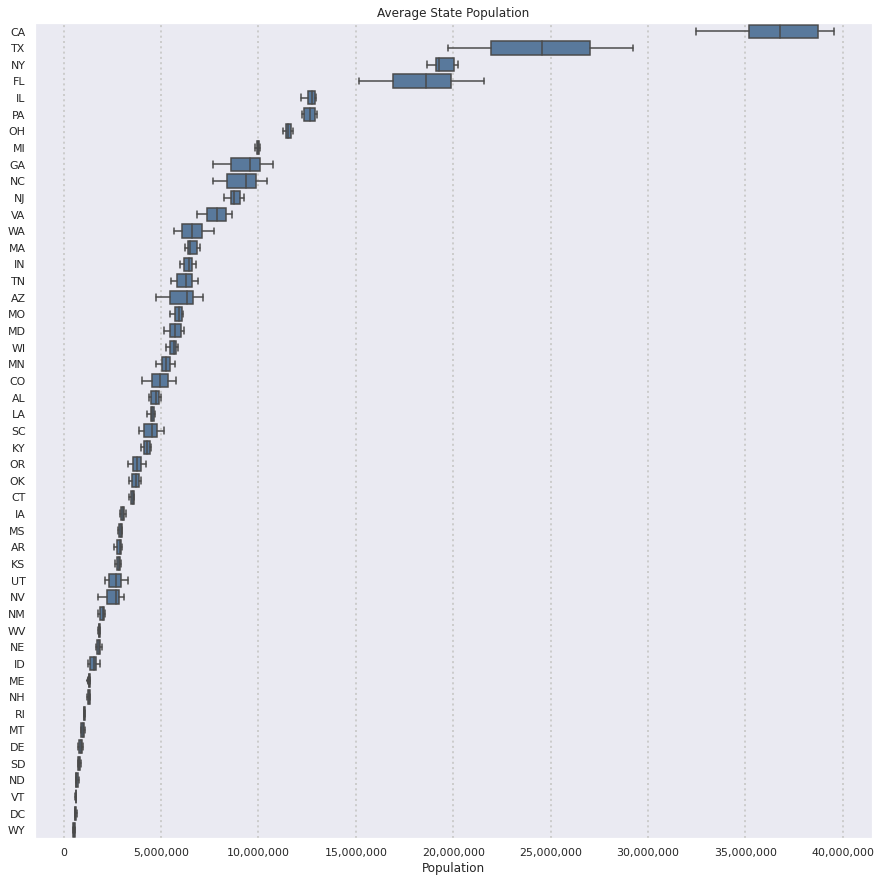

In [445]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 15))

# Plot 
sns.boxplot(x='population', y='state', data=df, color='#4e79a7', order=mean_sort)

# Axis Settings
plt.grid(linewidth=2, which='major', axis='x', color='#cccccc', linestyle=':')

# Labeling
plt.ylabel('')
plt.xlabel('Population')
plt.title('Average State Population')

# unlock extra axis settings
ax  = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5000000))

Interesting to note that some states have a wider range of population than others. Florida for example has a fairly wide range in population, compared to Illinois, which is the 5th most populous state, but has esssentially no population change.

<a id='pop_interactive'></a>

In [446]:
# Interactive Notebook Plot

# Build Chart
fig = px.bar(df, y='state', x='population', orientation='h', 
            animation_frame=df['year'].dt.year, 
            animation_group="state", 
            text='population',
            text_auto='.3s',
            labels=dict(population="Population", state="", animation_frame="Year"),
            hover_data={'population':':,.0f'})

# Chart Aesthetic Options - workaround for animation w/ custom color and hover options
fig.update_traces(textposition='outside', marker_color='gray')
for f in fig.frames:
     f.data[0].update(textposition='outside', marker_color='gray')

# Axis Limits
fig.update_xaxes(range=[0, 45000000])

# Layout Options
fig.update_layout(
    width = 750,
    height = 1000,
    title='State Population Over Time',
    yaxis={'categoryorder':'total ascending'},
    showlegend=False)


fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

Now that we'll considered the overall state population, lets dig into the top 5 most populous states for more detail. 

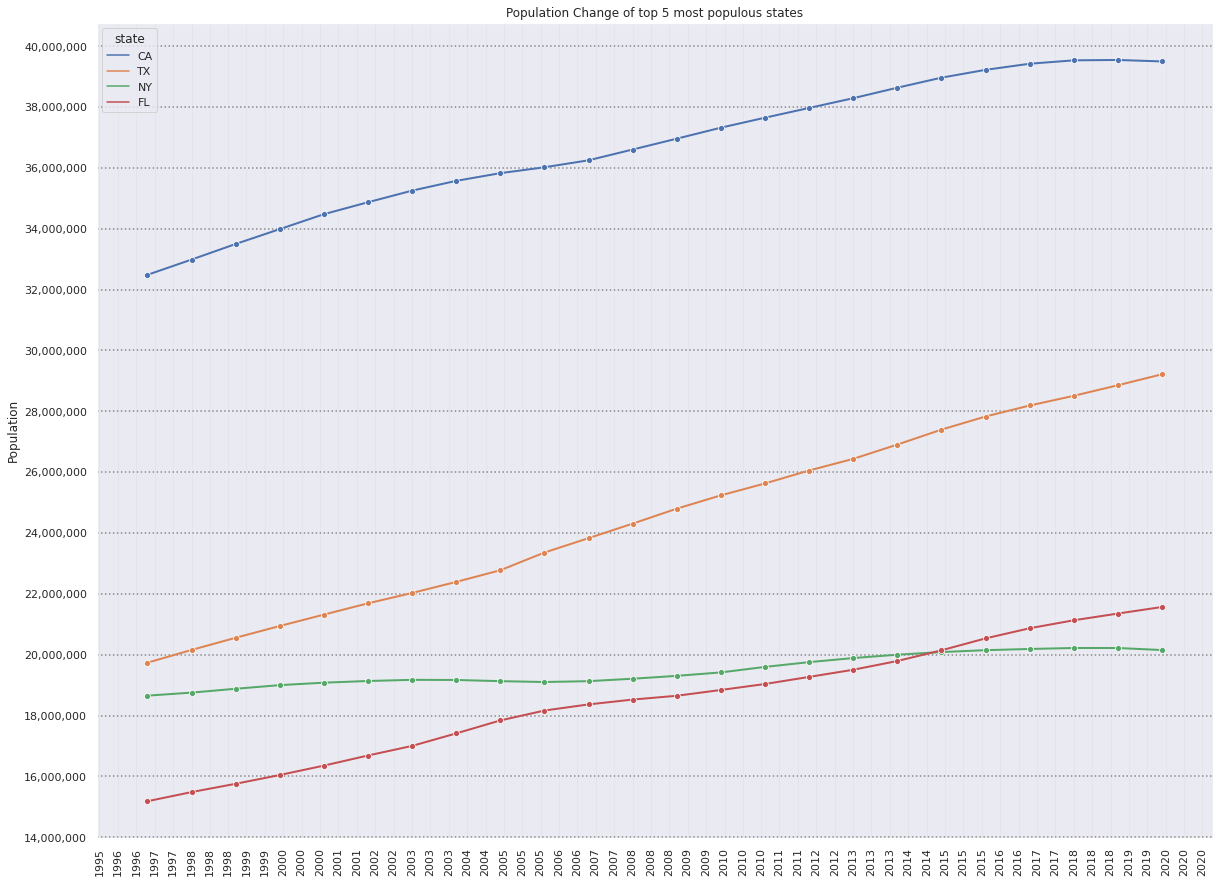

In [447]:
# Get top 5 most populous states
mean_sort = df.groupby('state')['population'].mean().sort_values(ascending=False).head(4).index


# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20, 15))

# Plot 
sns.lineplot(y='population', x='year', data=df, color='#4e79a7', marker="o", linewidth=2, hue='state', hue_order=mean_sort)

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc',linestyle='-', alpha=0.2)
plt.grid(which='major', axis='y', color='#8a8a8a', linestyle=':', linewidth=1.5)


# Labeling
plt.xlabel('')
plt.ylabel('Population')
plt.title('Population Change of top 5 most populous states')

# unlock extra axis settings
ax  = plt.gca()
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000000))

# Set time series display format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # set year/month format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5)) # set frequency
plt.xticks(rotation = 90)

plt.show();

We can see that Florida and Texas have a pretty constant increase in population over the time series. California also enjoyed a constant increase in population until recently where it began to plateau, and even decrease a bit. 
  
Viewing this plot does raise an interesting question though: what states undergo the highest rate of change in population?

In [448]:
# Get population in first and last year
pop_2020 = df[['state','population']].loc[df['year']=='2020'].reset_index(drop=True)
pop_1997 = df[['state','population']].loc[df['year']=='1997'].reset_index(drop=True)

# create new dataframe with population change
df2 = pd.DataFrame()

#populate with values from first list
df2[['state','pop_2020']] = pop_2020

# merge second list into first list
df2 = df2.merge(pop_1997, on='state', how='left')

# rename columns for clarity
df2 = df2.rename(columns={'population':'pop_1997'})

# Get population difference
df2['pop_delta'] = df2.pop_2020 - df2.pop_1997

# sort dataframe before plotting
df2 = df2.sort_values(by='pop_delta', ascending=False)

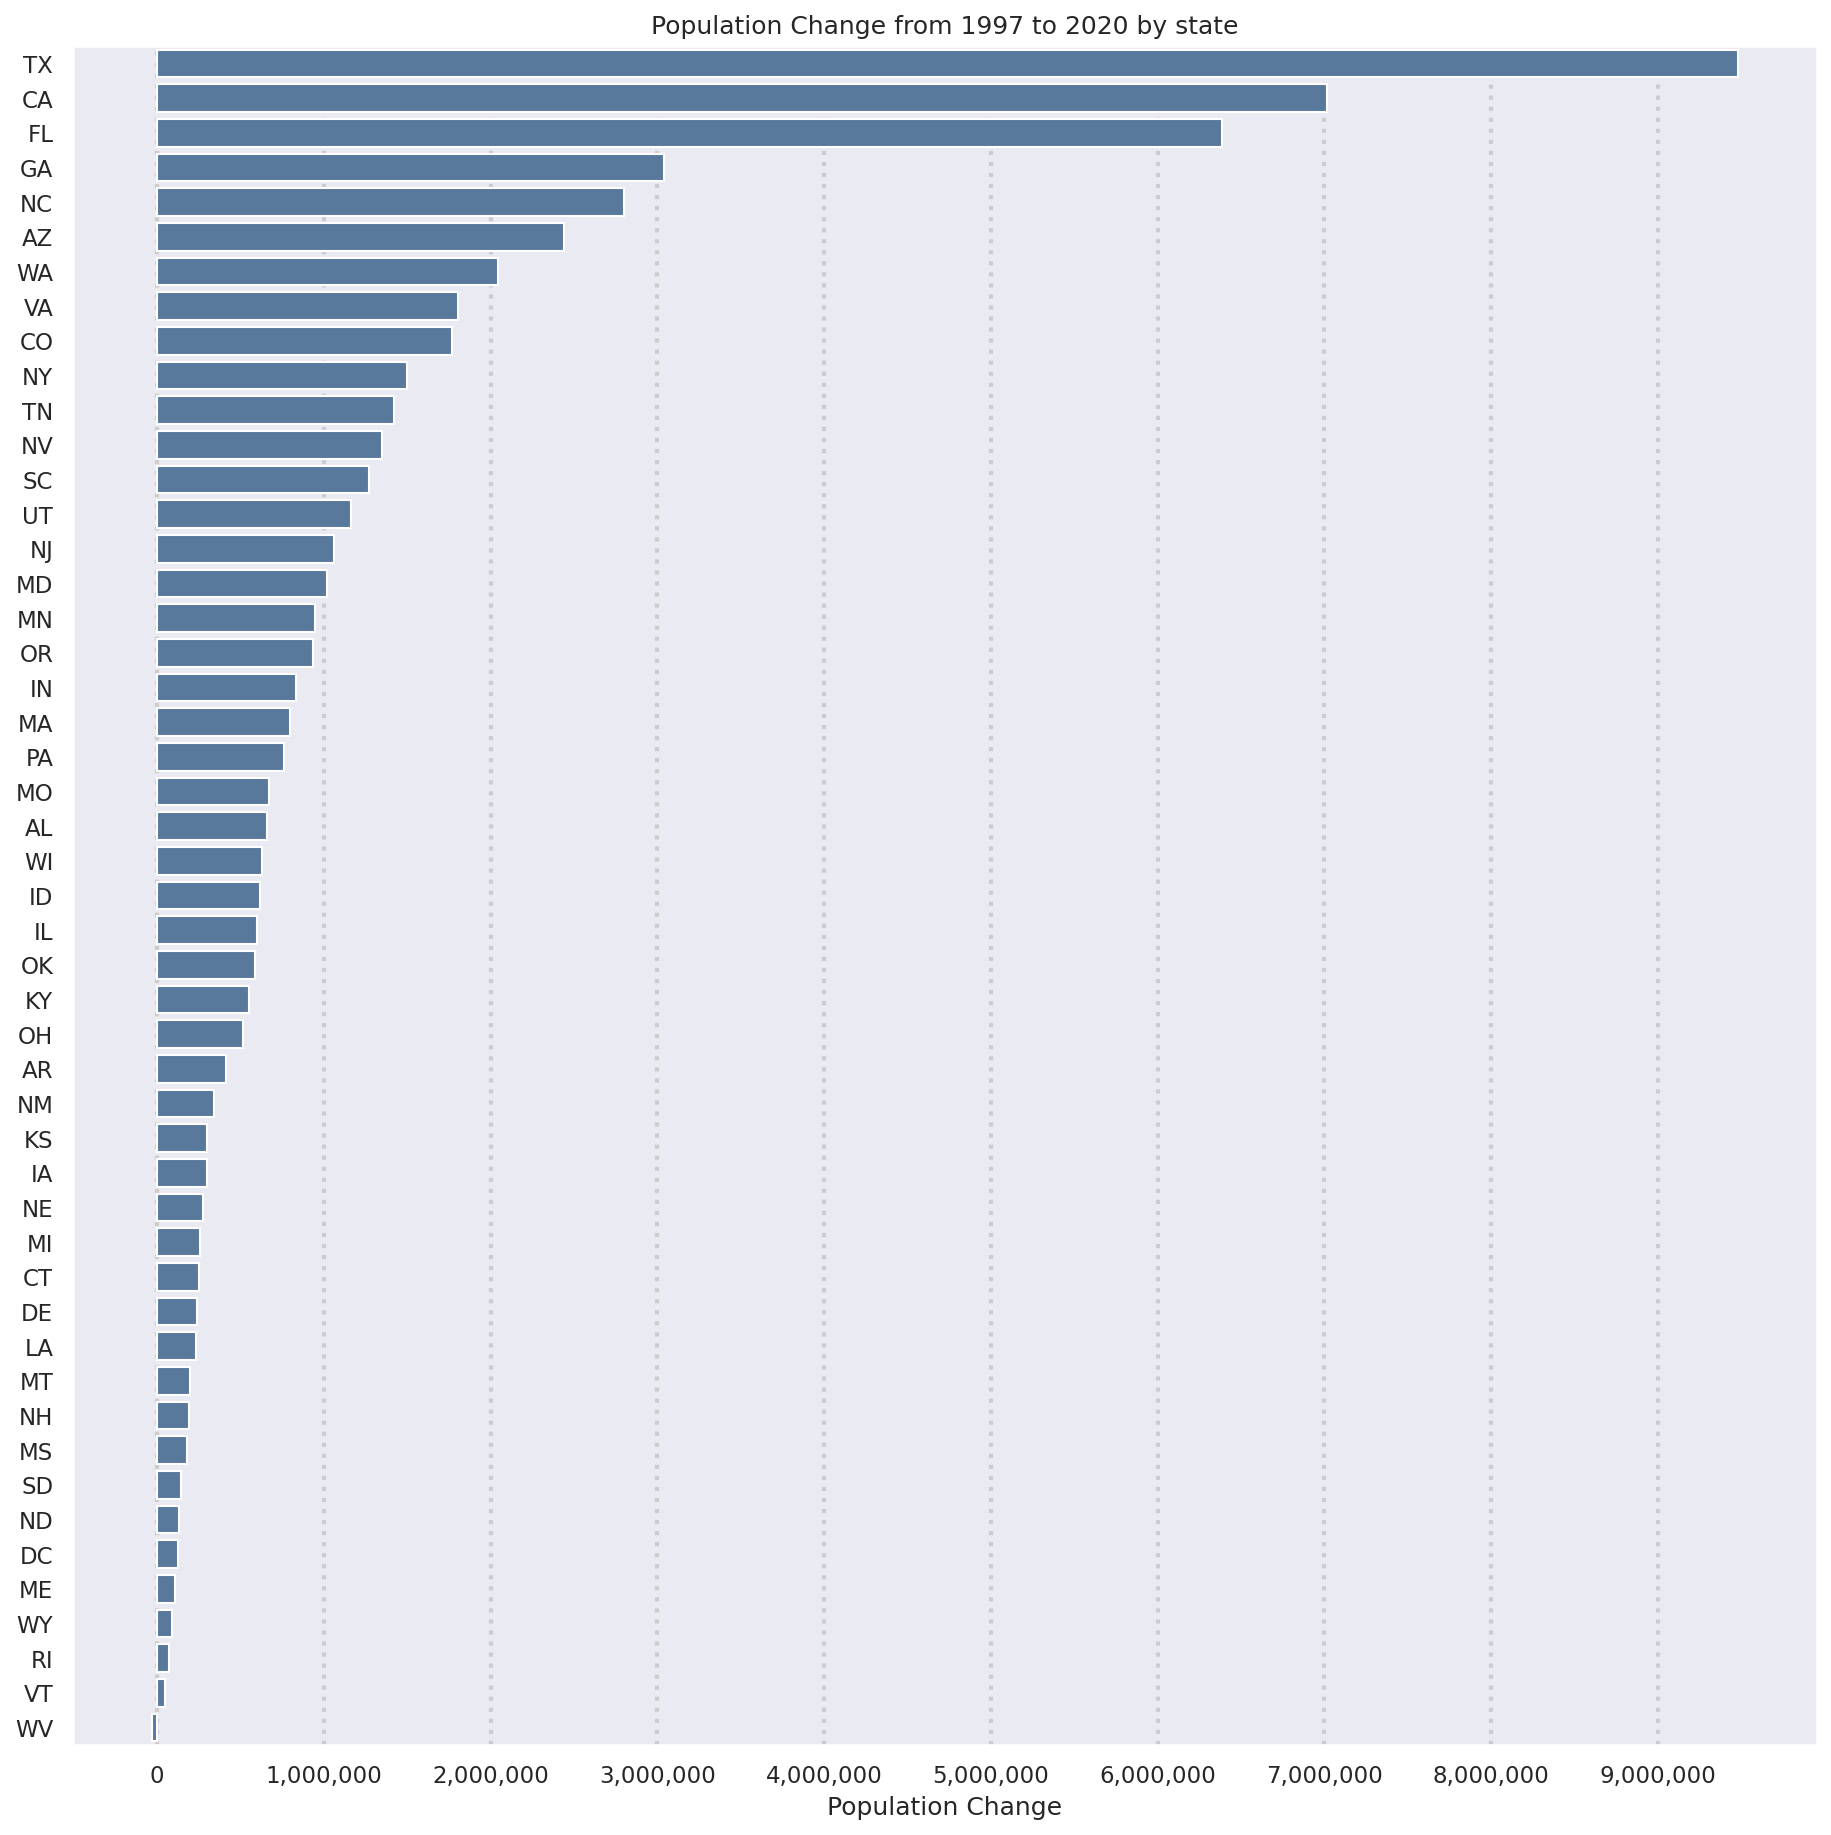

In [449]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 15))

# Plot 
sns.barplot(data=df2, x='pop_delta', y='state', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=2, which='major', axis='x', color='#cccccc', linestyle=':')

# Labeling
plt.xlabel('Population Change')
plt.ylabel('')
plt.title('Population Change from 1997 to 2020 by state')

# unlock extra axis settings
ax  = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000000))

plt.gcf().set_dpi(150)
plt.show();

Perhaps what interesting to note in this plot is that several of the top 10 states with most population change are nowhere near the most populous states, but they have seen a significant increase in population over the time series.
It might be interesting to look at our top 5 most populous states, but this time instead of looking at total population, we'll consider the population change from year to year for each of these states.

In [450]:
# clear df2 and repopulate with desired columns
df2 = pd.DataFrame()
df2[['state','year','population']] = df[['state','year','population']]

# sort df first to ensure data integrity
df2 = df2.sort_values(by=['state','year'], ascending=True)

# Get difference in population between years
df2['pop_change'] = df2.population.diff()

# Get first year
print(df2.year.min())

# Drop 1997, as no values should exist
df2 = df2[df2.year != '1997']

# Get New first year
print(df2.year.min())

# filter df2 to include only the top 5 most populous states
#df2 = df2[df2.state.isin(['CA','TX','NY','FL','IL'])]

1997-01-01 00:00:00
1998-01-01 00:00:00


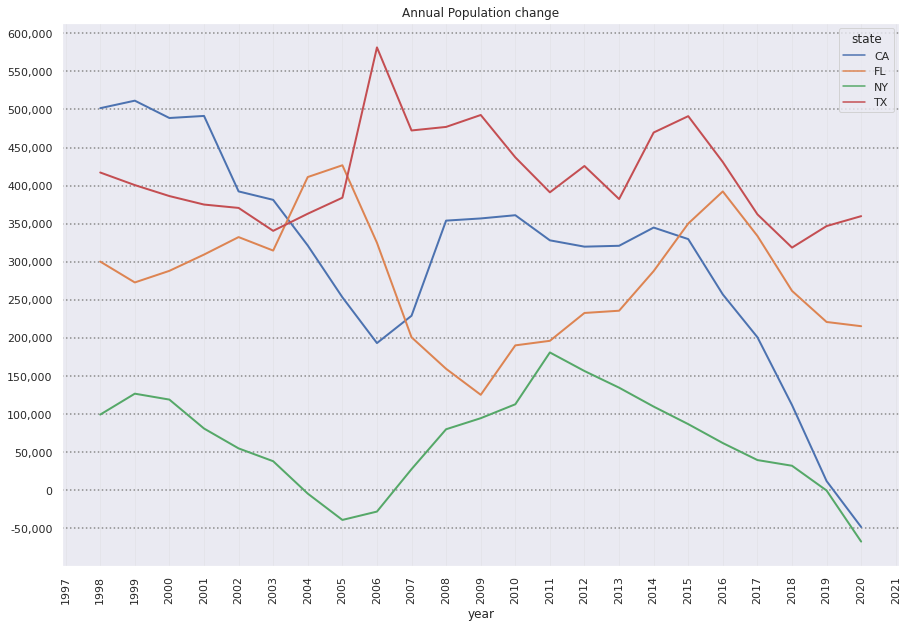

In [451]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 10))

# Plot 
sns.lineplot(y='pop_change', x='year', data=df2[df2.state.isin(['CA','TX','NY','FL'])], color='#4e79a7', linewidth=2, hue='state')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc',linestyle='-', alpha=0.2)
plt.grid(which='major', axis='y', color='#8a8a8a', linestyle=':', linewidth=1.5)

# Labeling
plt.ylabel('')
plt.ylabel('')
plt.title('Annual Population change')

# unlock extra axis settings
ax  = plt.gca()
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(50000))

# Set time series display format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # set year/month format
ax.xaxis.set_major_locator(mdates.YearLocator(1)) # set frequency
plt.xticks(rotation = 90)

plt.show();

The Rate of annual population change in the top 5 most populous states much more interesting than consider just population each year. What really stands out is that IL, population change became negative in 2015, and in 2019 it became negative for CA and NY. Earlier we saw that WV had an overall negative population change from 1997 to 2020, so we'll take a quick look at that state as well. 

<a id='pop_delta_interactive'></a>

In [452]:
df3 = df2[df2.state.isin(['CA','TX','NY','FL'])]

fig = px.bar(df3, y='pop_change', x='state', animation_frame=df3['year'].dt.year, animation_group="state", 
            text='pop_change',
            text_auto='.3s',
            labels=dict(pop_change="Population Change", state="", animation_frame="Year"),
            hover_data={'population':':,.0f'})

# Set custom axis to avoid misrepresentation
fig.update_yaxes(range=[-100000, 600000])

fig.update_layout(
    width = 1000,
    height = 500,
    title='Year over Year Population Change',
    xaxis={'categoryorder':'total descending'},
    showlegend=False)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

We also provide a quick look at the population change for each state. Note the exodus in Lousiana, in 2006 following Hurrican Katrina. 

In [453]:
fig = px.bar(df2, y='pop_change', x='state', animation_frame=df2['year'].dt.year, animation_group="state", 
            text='pop_change',
            text_auto='.3s',
            labels=dict(pop_change="Population Change", state="", animation_frame="Year"),
            hover_data={'population':':,.0f'})

# Set custom axis to avoid misrepresentation
fig.update_yaxes(range=[-300000, 600000])

fig.update_layout(
    width = 1000,
    height = 500,
    title='Year over Year Population Change',
    xaxis={'categoryorder':'total descending'},
    showlegend=False)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 2.5

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

It's very interesting to note that the states that start out with the highest increase in population, are also the states that end up losing population in the last few years.

#### User Selectable Population Change By State

### Population Correlation

Let's run a quick correlation analysis of population against all other attributes. We'll keep in mind that we can discard some attributes as they'll simply be a function of population, and not something that's truly correlated with population.

In [454]:
# Create df
pop_corr = pd.DataFrame()

pop_corr['attribute'] = df.corr()['population'].sort_values(ascending=False).index
pop_corr['corr'] = df.corr()['population'].sort_values(ascending=False).values

# Remove self correlation
pop_corr = pop_corr.iloc[2:]

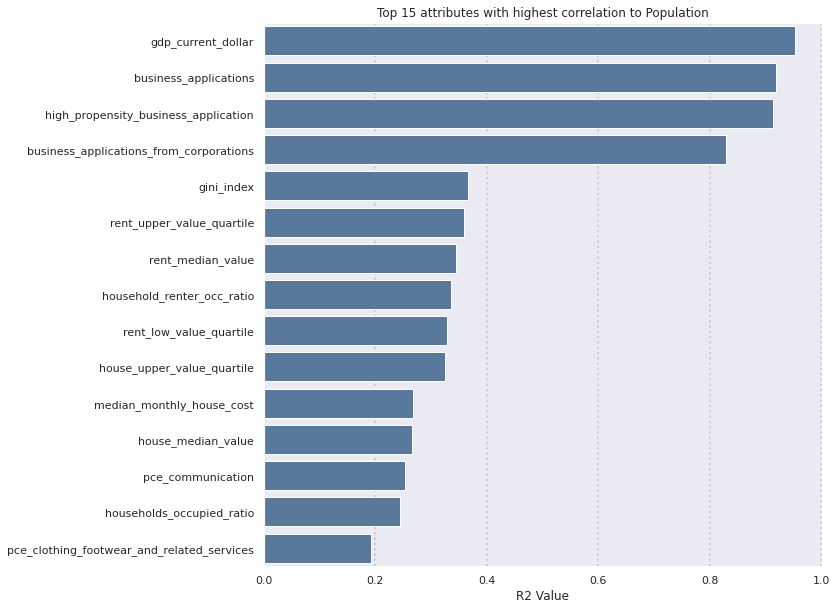

In [455]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.barplot(data=pop_corr.head(15), x='corr', y='attribute', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=2, which='major', axis='x', color='#cccccc', linestyle=':')

# Labeling
plt.xlabel('R2 Value')
plt.ylabel('')
plt.title('Top 15 attributes with highest correlation to Population')

plt.show();

As we might expect, population is a significant correlated to GDP as a whole, but interestingly per capita GDP doesn't even appear on our top 15 most correlated attributes.
First we'll look at GDP, then we'll consider some other per-capita based attributes

In [456]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['mean_pop'] = df.groupby('state')['population'].mean().values

# Get mean of gdp per state
df2['mean_gdp'] = df.groupby('state')['gdp_current_dollar'].mean().values

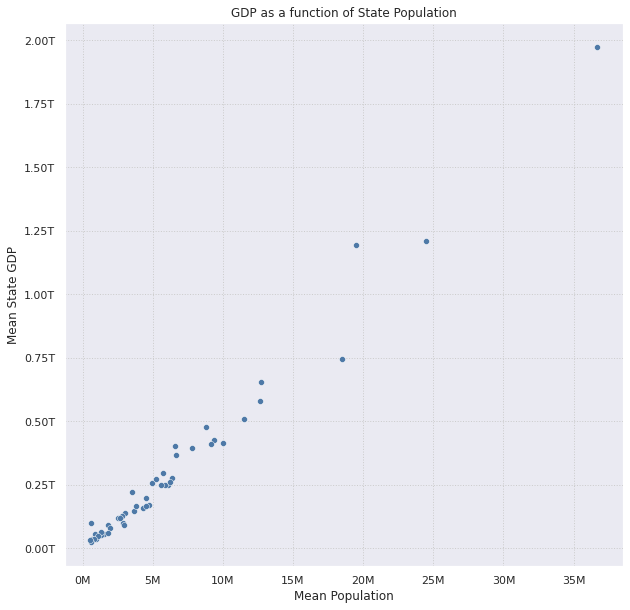

In [457]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='mean_pop', y='mean_gdp', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000000) + 'T'))


# Labeling
plt.xlabel('Mean Population')
plt.ylabel('Mean State GDP')
plt.title('GDP as a function of State Population')

plt.show();

<a id='pop_gdp_scatter'></a>

In [458]:
fig = px.scatter(df, x='population', y='gdp_current_dollar', animation_frame=df['year'].dt.year, animation_group="state",
                labels=dict(population="State Population", gdp_current_dollar="State GDP", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 45000000])
# fig.update_yaxes(range=[0, 3000000])

fig.update_layout(
    width = 800,
    height = 800,
    title='GDP as a function of State Population')

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

We can very clearly see that population and total GDP have a linear relationship. This makes sense, as the more people live in a given state, the more economic output that state is capable of producing.
Let's see if this holds true for per-capita-gdp, as we're primarily interesting in the effects of state economy on an individuals quality of life. 

In [459]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['mean_pop'] = df.groupby('state')['population'].mean().values

# Get mean of gdp per state
df2['mean_per_cap_gdp'] = df.groupby('state')['per_cap_gdp_current_dollar'].mean().values

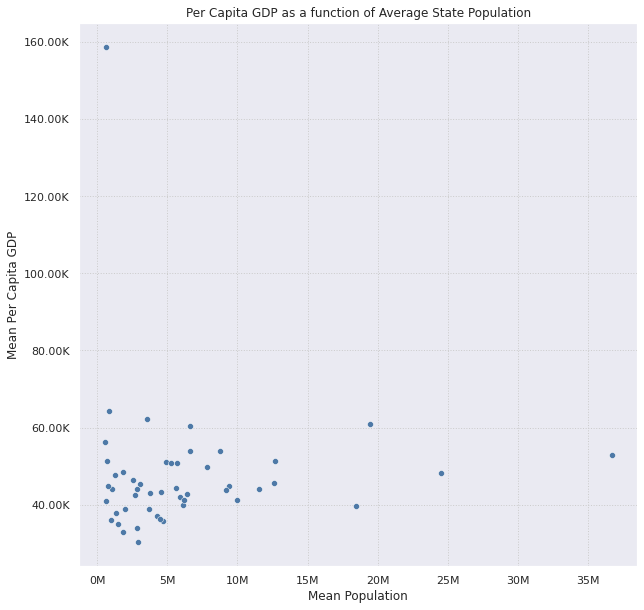

In [460]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='mean_pop', y='mean_per_cap_gdp', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Mean Population')
plt.ylabel('Mean Per Capita GDP')
plt.title('Per Capita GDP as a function of Average State Population')

plt.show();

<a id='per_cap_gdp_pop'></a>

In [461]:
fig = px.scatter(df, x='population', y='per_cap_gdp_current_dollar', 
                animation_frame=df['year'].dt.year, 
                animation_group="state",
                labels=dict(population="State Population", per_cap_gdp_current_dollar="Per Capita GDP", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation#
fig.update_xaxes(range=[0, 45000000])
fig.update_yaxes(range=[0, 250000])

fig.update_layout(
    width = 750,
    height = 750,
    title='Per Capita GDP as a function of State Population')

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

As we can see, while Per Capita GDP does rise as time goes on, the linear relationship previously seen with total GDP has disappeared completely. Also of note, is that we can see the 08 recession effects in the per-capita-gdp drop in 2009. 
  
What this plot tells us is that the size of a states population does not have a significant impact on the per person GDP of citizens in that state. To use more casual verbage, we could say that just because a state has a larger population, doesn't mean the the individuals in that state contribute to the State GDP more. 

#### Gini Index

In [462]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['mean_pop'] = df.groupby('state')['population'].mean().values

# Get mean of gdp per state
df2['gini_index'] = df.groupby('state')['gini_index'].mean().values

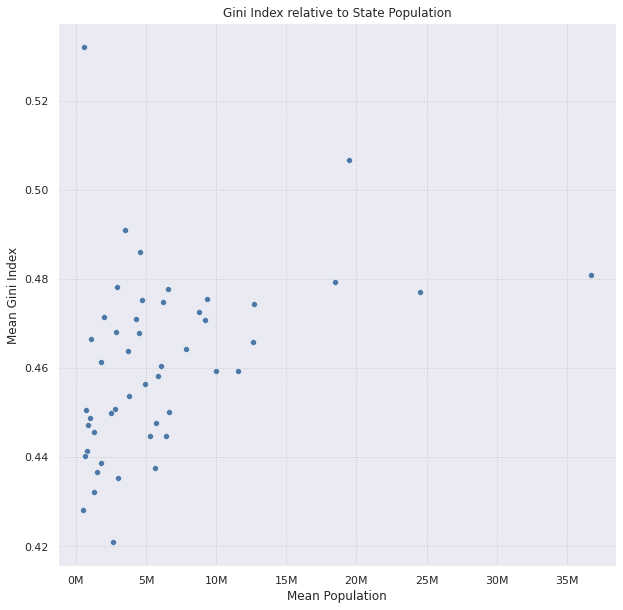

In [463]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='mean_pop', y='gini_index', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Mean Population')
plt.ylabel('Mean Gini Index')
plt.title('Gini Index relative to State Population')

plt.show();

<a id='gini_population'></a>

In [464]:
# subset df2 to include only years with gini index
df2 = df.loc[(df['year'] > '2006') & (df['year'] < '2020')]

fig = px.scatter(df2, x='population', y='gini_index', 
                animation_frame=df2['year'].dt.year, 
                animation_group="state",
                labels=dict(population="State Population", per_cap_gdp_current_dollar="Per Capita GDP", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 45000000])

fig.update_layout(
    width = 750,
    height = 750,
    title='Gini Index Relative to State Population',
    yaxis_range=[0.3,0.6]
    )

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

#### Median Rental Cost vs GDP

In [465]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['mean_pop'] = df.groupby('state')['population'].mean().values

# Get mean of gdp per state
df2['median_rent'] = df.groupby('state')['rent_median_value'].mean().values

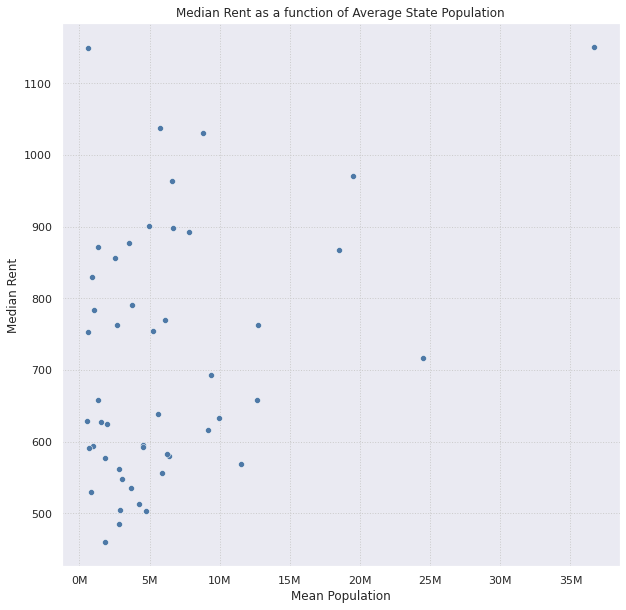

In [466]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='mean_pop', y='median_rent', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Mean Population')
plt.ylabel('Median Rent')
plt.title('Median Rent as a function of Average State Population')

plt.show();

<a id='median_rent'></a>

In [467]:
# subset df2 to include only years with gini index
df2 = df.loc[(df['year'] > '2004') & (df['year'] < '2020')]

fig = px.scatter(df2, x='population', y='rent_median_value', 
                animation_frame=df2['year'].dt.year, 
                animation_group="state",
                labels=dict(population="State Population", rent_median_value="Median Rent", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 45000000])
fig.update_yaxes(range=[0, 1600])

fig.update_layout(
    width = 750,
    height = 750,
    title='Median Rent as a function of State Population',
    )

fig.show()

While no linear relationship exists between median rent and state population, we do see that median rent has been steadily increasing since the beginning of its date availability in 2006.

**[Return to Interactive Plot Directory](#return_home)**

#### Percent of households occupied by renters

In [468]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['mean_pop'] = df.groupby('state')['population'].mean().values

# Get mean of gdp per state
df2['household_renters_occ'] = df.groupby('state')['household_renter_occ_ratio'].mean().values

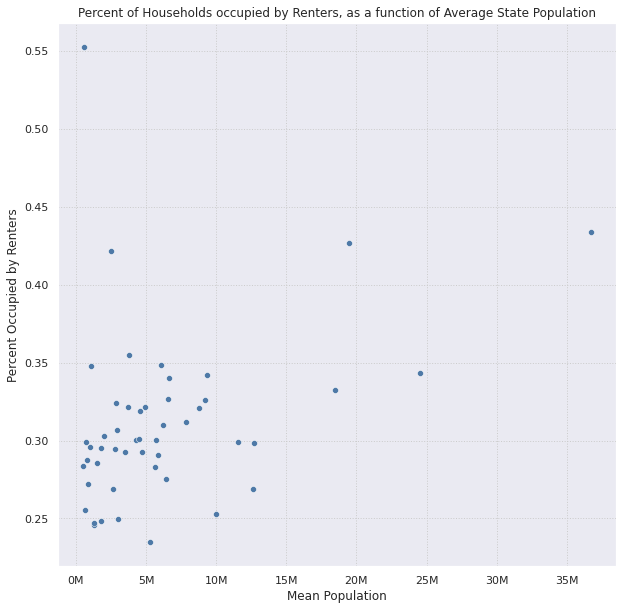

In [469]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='mean_pop', y='household_renters_occ', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Mean Population')
plt.ylabel('Percent Occupied by Renters')
plt.title('Percent of Households occupied by Renters, as a function of Average State Population')

plt.show();

<a id='renter_occ'></a>

In [470]:
# subset df2 to include only years with gini index
df2 = df.loc[(df['year'] > '2004') & (df['year'] < '2020')]

fig = px.scatter(df2, x='population', y='household_renter_occ_ratio', 
                animation_frame=df2['year'].dt.year, 
                animation_group="state",
                labels=dict(population="State Population", household_renter_occ_ratio="Percent Occupied by Renters", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 45000000])


fig.update_layout(
    yaxis_range=[0.1, 0.6],
    width = 750,
    height = 750,
    title='Households occupied by Renters as a function of State Population',
    )

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

#### Household Value Exploration

In [471]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['mean_pop'] = df.groupby('state')['population'].mean().values

# Get mean of gdp per state
df2['house_value_upper_q'] = df.groupby('state')['house_upper_value_quartile'].mean().values

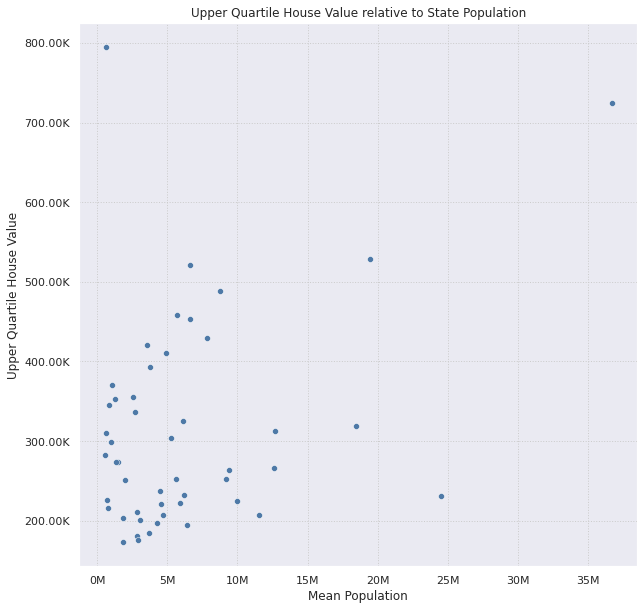

In [472]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='mean_pop', y='house_value_upper_q', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Mean Population')
plt.ylabel('Upper Quartile House Value')
plt.title('Upper Quartile House Value relative to State Population')

plt.show();

<a id='house_value'></a>

In [473]:
# subset df2 to include only years with gini index
df2 = df.loc[(df['year'] > '2004') & (df['year'] < '2020')]

fig = px.scatter(df2, x='population', y='house_upper_value_quartile', 
                animation_frame=df2['year'].dt.year, 
                animation_group="state",
                labels=dict(population="State Population", house_upper_value_quartile="Upper Quartile House Value", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 45000000])
fig.update_yaxes(range=[0, 1000000])


fig.update_layout(
    width = 750,
    height = 750,
    title='Upper Quartile House Value as it relates to State Population',
    yaxis=dict(tickformat="$,.0f")
    )

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

We can see there there are quite a few major categories of attributes that are highly correlated with Per Capita GDP.
  
We would expect the first 2, as they are also GDP measures. Per Capita Personal Income is especially important to note. This suggests that as a state increases it's GDP per person, that persons income also goes up. First We'll consider the relationship between Per Capitda GDP and Per Capita Personal Income, then we'll look only at Per Capita PCE per state.

### Surplus Income Exploration

In [474]:
df.columns[df.columns.str.contains('pce')]

Index(['pce_clothing_footwear_and_related_services', 'pce_communication',
       'pce_education', 'pce_financial_services_and_insurance',
       'pce_food_and_beverages_purchased_for_off-premises_consumption',
       'pce_food_services_and_accommodations',
       'pce_furnishings_household_equipment_and_routine_household_maintenance',
       'pce_health', 'pce_housing_utilities_and_fuels',
       'pce_other_goods_and_services', 'pce_total', 'pce_recreation',
       'pce_transportation'],
      dtype='object')

In [475]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['personal_inc'] = df.groupby('state')['per_capita_personal_income'].mean().values

# Get mean of gdp per state
df2['total_pce'] = df.groupby('state')['pce_total'].mean().values

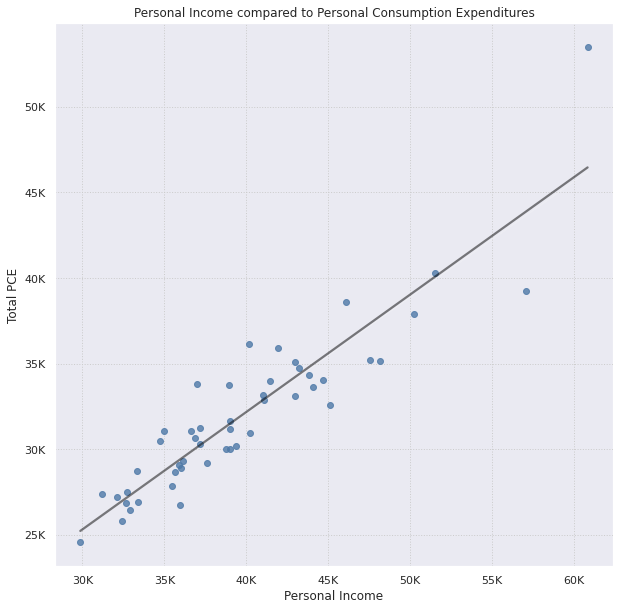

In [476]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.regplot(data=df2, x='personal_inc', y='total_pce', color='#4e79a7', ci=False, line_kws={"color": "black", "alpha": 0.5})

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Personal Income')
plt.ylabel('Total PCE')
plt.title('Personal Income compared to Personal Consumption Expenditures')

plt.show();

We can see a generally linear relationship between personal income and PCE, though the dispersion is higher than we would normally like to use any sort of linear model. Based on this dispersion, we can say that some states provide a higher income surplus that others do. 
  
Let's calculate a measure of surplus income, and then explore it a bit. 

In [477]:
# calculate surplus income
df['surplus_income'] = df['per_capita_personal_income'] - df['pce_total']

In [478]:
mean_sort = df.groupby('state')['surplus_income'].mean().sort_values(ascending=False).index

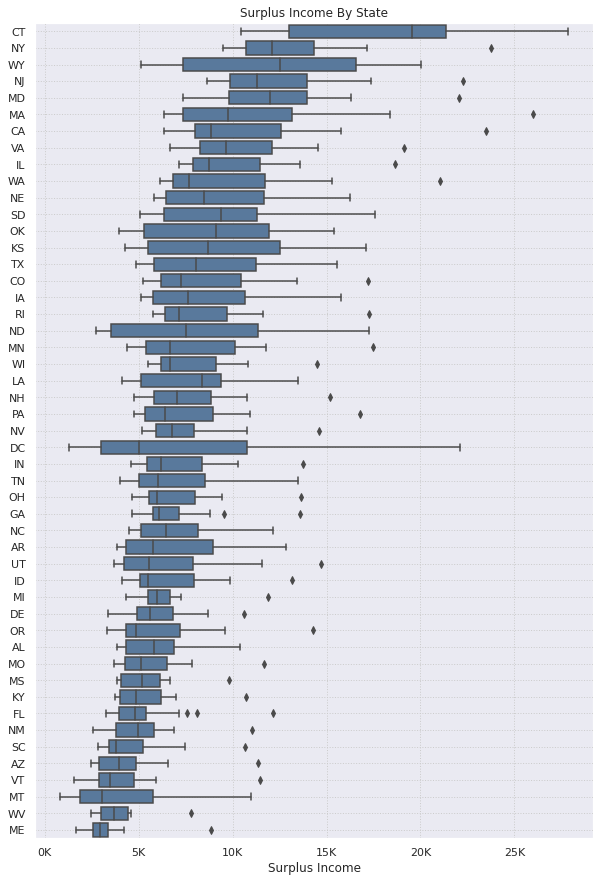

In [479]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 15))

# Plot 
sns.boxplot(data=df, x='surplus_income', y='state', color='#4e79a7', order=mean_sort)

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('')
plt.title('Surplus Income By State')

plt.show();

<a id='surplus_income_state'></a>

In [480]:

fig = px.bar(df, x='surplus_income', y='state', 
                animation_frame=df['year'].dt.year, 
                text='surplus_income',
                text_auto='.3s',
                hover_data={'surplus_income':':,.0f'},
                labels=dict(surplus_income="Surplus Income", animation_frame='Year', state=''))

fig.update_traces(textposition='outside', marker_color='gray')
for f in fig.frames:
     f.data[0].update(textposition='outside', marker_color='gray')


# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 30000])

fig.update_layout(
    width = 750,
    height = 1000,
    title='Surplus Income Per year by State',
    #yaxis=dict(tickformat="$,.0f"),
    yaxis={'categoryorder':'total ascending'},
    showlegend=False
    )

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 2.5

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

We can see that the 50 states vary widely in their surplus income across the time series. Let's check for statistical differences using a two-way anova test. 

#### 2 Way Anova Test of Surplus Income

In [487]:
# Import regression tools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [482]:
# create df to use with Anova
df3 = df[['state','year','surplus_income']]

In [483]:
# Run 2 two anova test against surplus income + state
income_state = ols('surplus_income ~ C(state)', data=df3).fit()
anova_table = sm.stats.anova_lm(income_state, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(state),9075897870.08,48.00,22.75,0.00
Residual,9364924829.11,1127.00,NaN,NaN


In [484]:
# Run 2 two anova test against surplus income + state
income_year = ols('surplus_income ~ C(year)', data=df3).fit()
anova_table = sm.stats.anova_lm(income_year, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(year),7288334122.91,23.00,32.73,0.00
Residual,11152488576.27,1152.00,NaN,NaN


In [485]:
# Run 2 two anova test against surplus income + state
income_state_year = ols('surplus_income ~ C(year) + C(state)', data=df3).fit()
anova_table = sm.stats.anova_lm(income_state_year, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(year),7288334122.91,23.00,168.47,0.00
C(state),9075897870.08,48.00,100.52,0.00
Residual,2076590706.19,1104.00,NaN,NaN


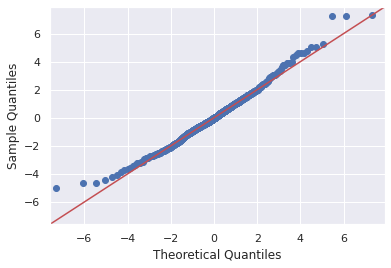

In [489]:
# Create QQ plot
res = income_state_year.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

We can see that regardless of whether they are considered in separate anova tests, or in a single anova test, state and year both have a statistically significant effect on surplus income. QQ plot displays that normality is not perfect on the tails, but its not so bad that we would throw out the results of this test entirely. 

#### Surplus Income Correlation Test

first we'll remove attributes that correspond to personal income, since we already know that these will have a strong impact on surplus income.

In [490]:
df2 = df.drop(columns=['per_capita_personal_income', 'pce_total','median_income'])

In [491]:
pop_corr = pd.DataFrame()

pop_corr['attribute'] = df2.corr()['surplus_income'].sort_values(ascending=False).head(11).iloc[1:].index
pop_corr['corr'] = df2.corr()['surplus_income'].sort_values(ascending=False).head(11).iloc[1:].values

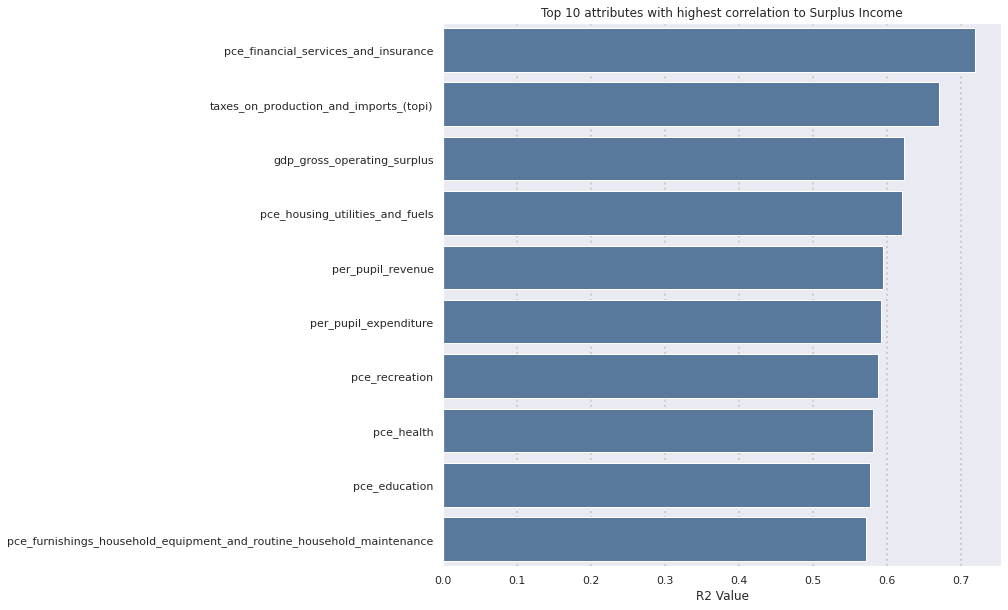

In [492]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.barplot(data=pop_corr, x='corr', y='attribute', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=2, which='major', axis='x', color='#cccccc', linestyle=':')

# Labeling
plt.xlabel('R2 Value')
plt.ylabel('')
plt.title('Top 10 attributes with highest correlation to Surplus Income')

plt.show();

The high correlation with financial services and insurance is interesting, as is the taxes on production. Also of particular note is the per pupil revenue(funding) and expenditure. 

#### Surplus income vs Financial PCE

In [493]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['pce_finance'] = df.groupby('state')['pce_financial_services_and_insurance'].mean().values

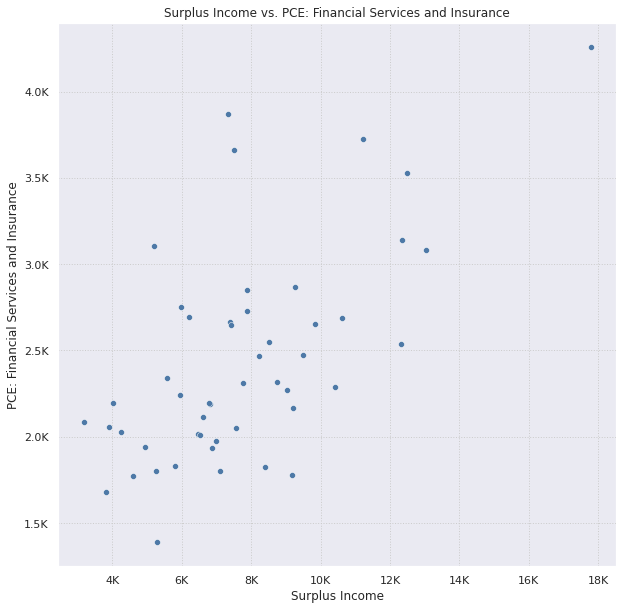

In [494]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='pce_finance', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('PCE: Financial Services and Insurance')
plt.title('Surplus Income vs. PCE: Financial Services and Insurance')

plt.show();

#### Surplus Income Vs. Taxes

In [495]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['topi'] = df.groupby('state')['taxes_on_production_and_imports_(topi)'].mean().values

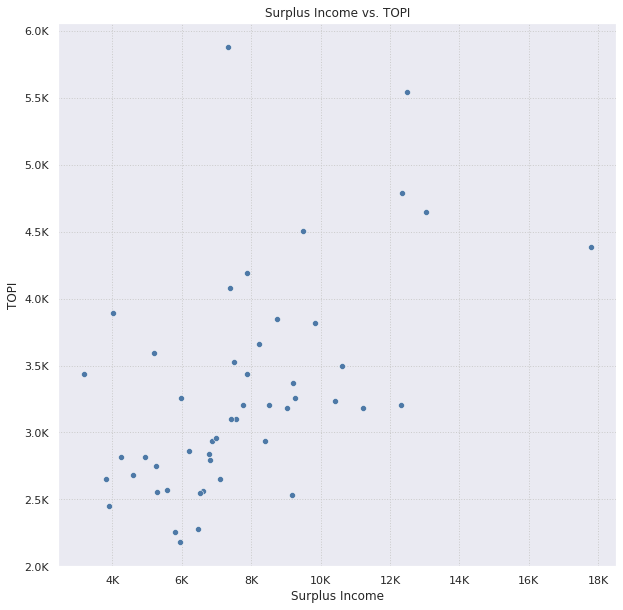

In [496]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='topi', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('TOPI')
plt.title('Surplus Income vs. TOPI')

plt.show();

No strong visible relationship.  

#### Surplus Income vs. PCE Housing Costs

In [497]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['dependent'] = df.groupby('state')['pce_housing_utilities_and_fuels'].mean().values

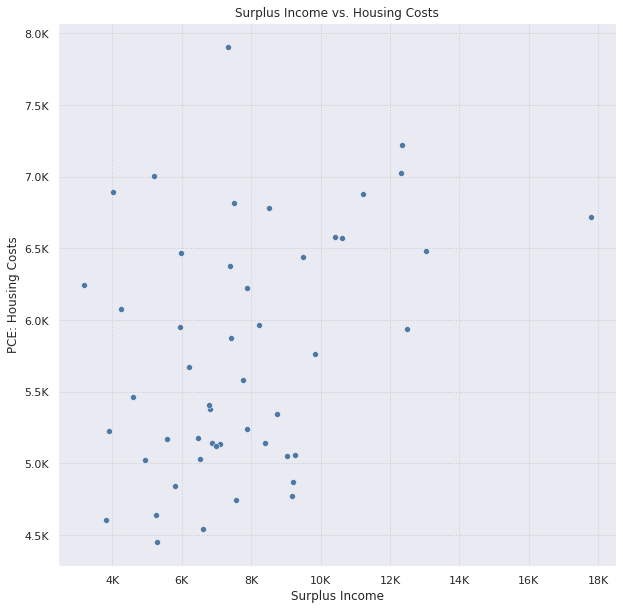

In [498]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='dependent', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('PCE: Housing Costs')
plt.title('Surplus Income vs. Housing Costs')

plt.show();

Again no clear visible relationship. 

#### Per Student Funding and Expenditure vs. Surplus Income

In [499]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['dependent'] = df.groupby('state')['per_pupil_revenue'].mean().values

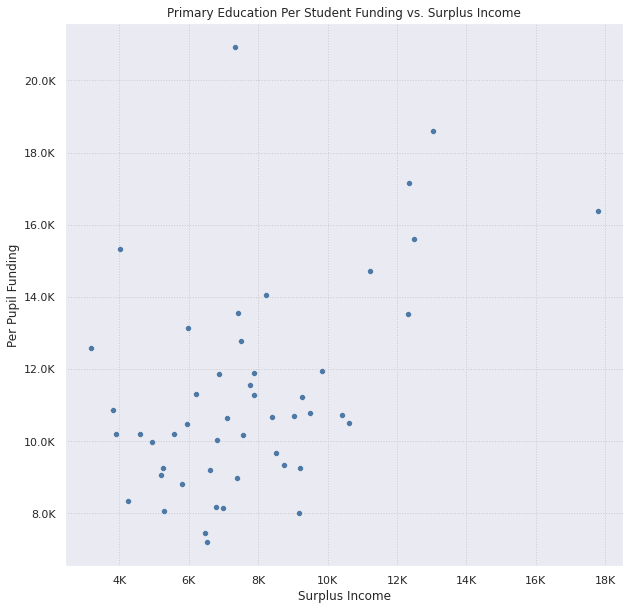

In [500]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='dependent', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('Per Pupil Funding')
plt.title('Primary Education Per Student Funding vs. Surplus Income')

plt.show();

Towards the top right of the plot, we see that states in which citizens enjoy a higher surplus income, also provide more funding to schools. In the lower left however, this pattern breaks down. 

In [501]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['dependent'] = df.groupby('state')['per_pupil_expenditure'].mean().values

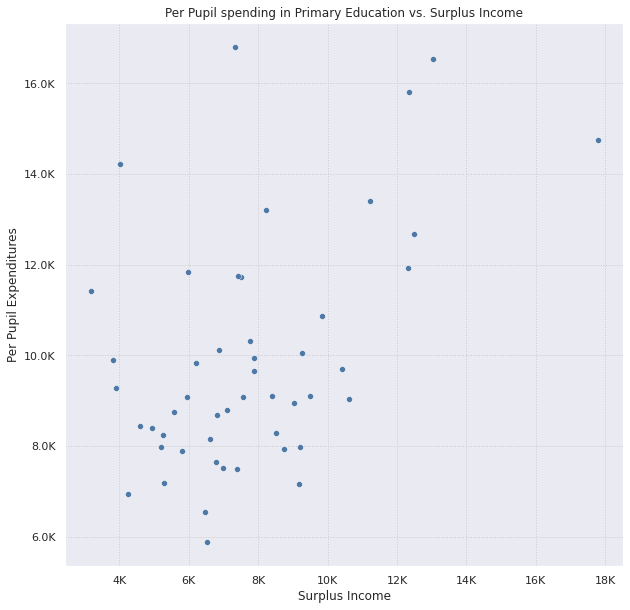

In [502]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='dependent', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('Per Pupil Expenditures')
plt.title('Per Pupil spending in Primary Education vs. Surplus Income')

plt.show();

The lack of clear linear relationship here means that there are states that provide a higher surplus income, that also make have a high rate of per student expenditures. In theory these states would be ideal for those looking for high quality education systems, though this rests on the assumption that schools that spend more per student provide a higher quality of education.

<a id='income_pupil_expenditure'></a>

In [503]:
# subset df2 to include only years with gini index
df2 = df.loc[(df['year'] < '2019')]

fig = px.scatter(df2, x='surplus_income', y='per_pupil_expenditure', 
                animation_frame=df2['year'].dt.year, 
                animation_group="state",
                labels=dict(surplus_income="Surplus Income", per_pupil_expenditure="Per Pupil Expenditure", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 50000])
fig.update_yaxes(range=[0, 25000])


fig.update_layout(
    width = 750,
    height = 750,
    title='Primary Education, Per Pupil Expenditures vs Surplus Income',
    yaxis=dict(tickformat="$,.0f")
    )

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

#### Recreational Spending vs surplus Income

In [504]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['dependent'] = df.groupby('state')['pce_recreation'].mean().values

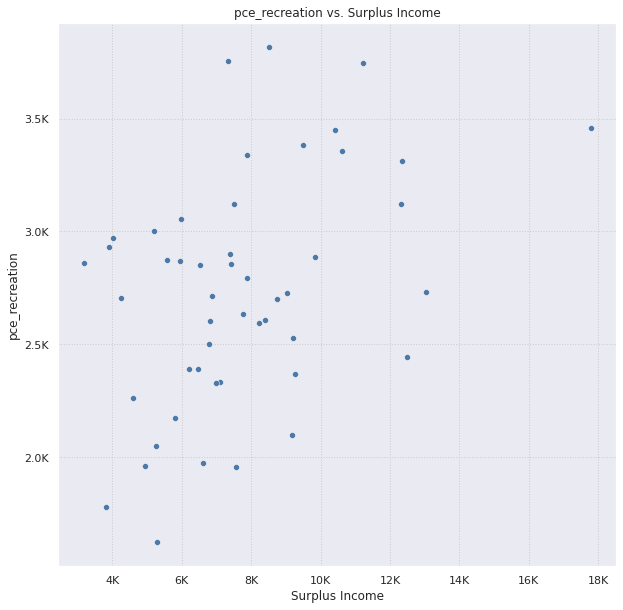

In [505]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='dependent', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('pce_recreation')
plt.title('pce_recreation vs. Surplus Income')

plt.show();

In general states with higher per capita spending on recreation also enjoy a higher surplus income.However, Increased spending on recreation is not reflective of the quality of type of recreation available.

#### PCE Health vs surplus income

In [506]:
# Scatter plot setup
df2 = pd.DataFrame()

# Get mean of population and GDP Per state
df2['surplus_income'] = df.groupby('state')['surplus_income'].mean().values

# Get mean of gdp per state
df2['dependent'] = df.groupby('state')['pce_health'].mean().values

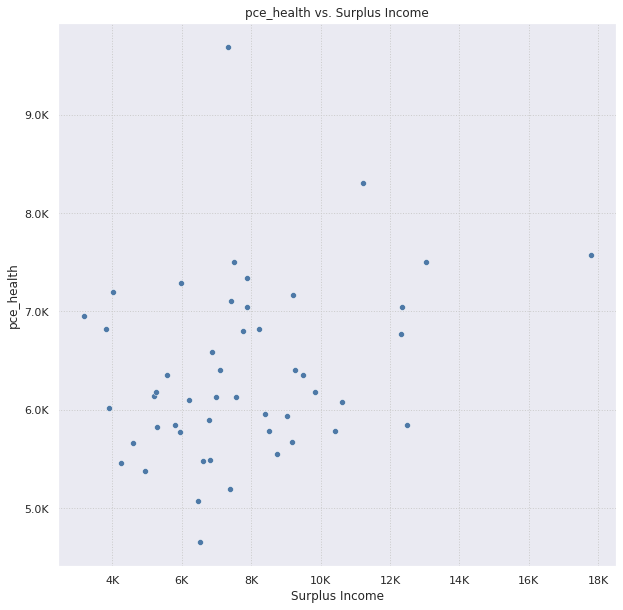

In [507]:
# Plot config
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 10))

# Plot 
sns.scatterplot(data=df2, x='surplus_income', y='dependent', color='#4e79a7')

# Axis Settings
plt.grid(linewidth=1, which='major', axis='x', color='#cccccc', linestyle=':')
plt.grid(linewidth=1, which='major', axis='y', color='#cccccc', linestyle=':')

# unlock extra axis settings
ax  = plt.gca()

# Axis Formatting
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000) + 'K'))


# Labeling
plt.xlabel('Surplus Income')
plt.ylabel('pce_health')
plt.title('pce_health vs. Surplus Income')

plt.show();

Difficult to draw conclusions, as spending on healthcare does not equate with quality of healthcare.

### EDA Summary

Based on our EDA so far, we believe that we can narrow idea states, from a select few attributes in the dataset.  
* `surplus_income`
* `per_pupil_expenditure`
* `gini_index`



In [508]:
# Limit years
df2 = df.loc[(df['year'] > '2005') & (df['year'] < '2019')]

<a id='income_expend_trans'></a>

In [509]:
fig = px.scatter_3d(df, x='surplus_income', y='per_pupil_expenditure', z='pce_transportation', color='state',
                animation_frame=df['year'].dt.year, 
                animation_group="state",
                labels=dict(surplus_income="Surplus Income", per_pupil_expenditure="Per Pupil Expenditure", pce_transportation="Transportation Costs", animation_frame='Year'),
                hover_data=['state'])

# Set custom axis to avoid misrepresentation
fig.update_xaxes(range=[0, 30000])
fig.update_yaxes(range=[0, 30000])


fig.update_layout(
    width = 1000,
    height = 1000,
    title='Primary Education, Per Pupil Expenditures vs Surplus Income',
    yaxis=dict(tickformat=",.0f"),
    xaxis=dict(tickformat="$,.0f"),
    showlegend=False
    )

fig.show()

**[Return to Interactive Plot Directory](#return_home)**

#### Linean Regression Analysis

In [510]:
import statsmodels.formula.api as smf


In [511]:
df.columns[df.columns.str.contains('tax')]

Index(['taxes_on_production_and_imports_(topi)'], dtype='object')

In [512]:
df2 = df
df2['taxes'] = df2['taxes_on_production_and_imports_(topi)']

In [513]:
model = smf.ols("surplus_income ~ pce_financial_services_and_insurance + taxes + gdp_gross_operating_surplus + pce_housing_utilities_and_fuels + per_pupil_revenue", data=df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         surplus_income   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     217.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          3.67e-160
Time:                        20:35:41   Log-Likelihood:                -9936.7
No. Observations:                1078   AIC:                         1.989e+04
Df Residuals:                    1072   BIC:                         1.992e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


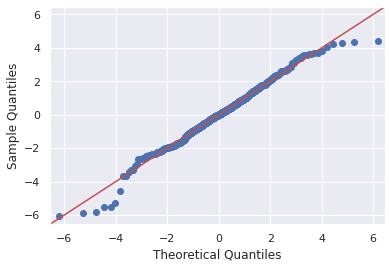

In [552]:
# Create QQ plot
res = model.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()